# **Step 1: Stock Price Analysis and Prediction**


## Importing Required Libraries for numerical analysis and prediction of stock prices

Technical Stack used : 
* Numpy Array
* Matplotlib
* Pandas
* Keras
* Scikit Learn
* Math

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

## Importing the Numerical dataset and performing Exploratory Analysis

In [6]:
# Dataframe for exploratory analysis
df=pd.read_csv('/Users/mahir/Downloads/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis/YESBANK.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-12,13.18,14.00,12.00,12.17,10.848567,244941515
1,2005-07-13,12.20,12.60,11.49,11.74,10.465257,64111620
2,2005-07-14,12.00,12.00,11.40,11.45,10.206746,16282865
3,2005-07-15,11.25,12.89,11.25,12.37,11.026851,75448030
4,2005-07-18,12.54,13.14,12.50,12.82,11.427987,75684775


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3813 entries, 0 to 3812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3813 non-null   object 
 1   Open       3813 non-null   float64
 2   High       3813 non-null   float64
 3   Low        3813 non-null   float64
 4   Close      3813 non-null   float64
 5   Adj Close  3813 non-null   float64
 6   Volume     3813 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 208.6+ KB


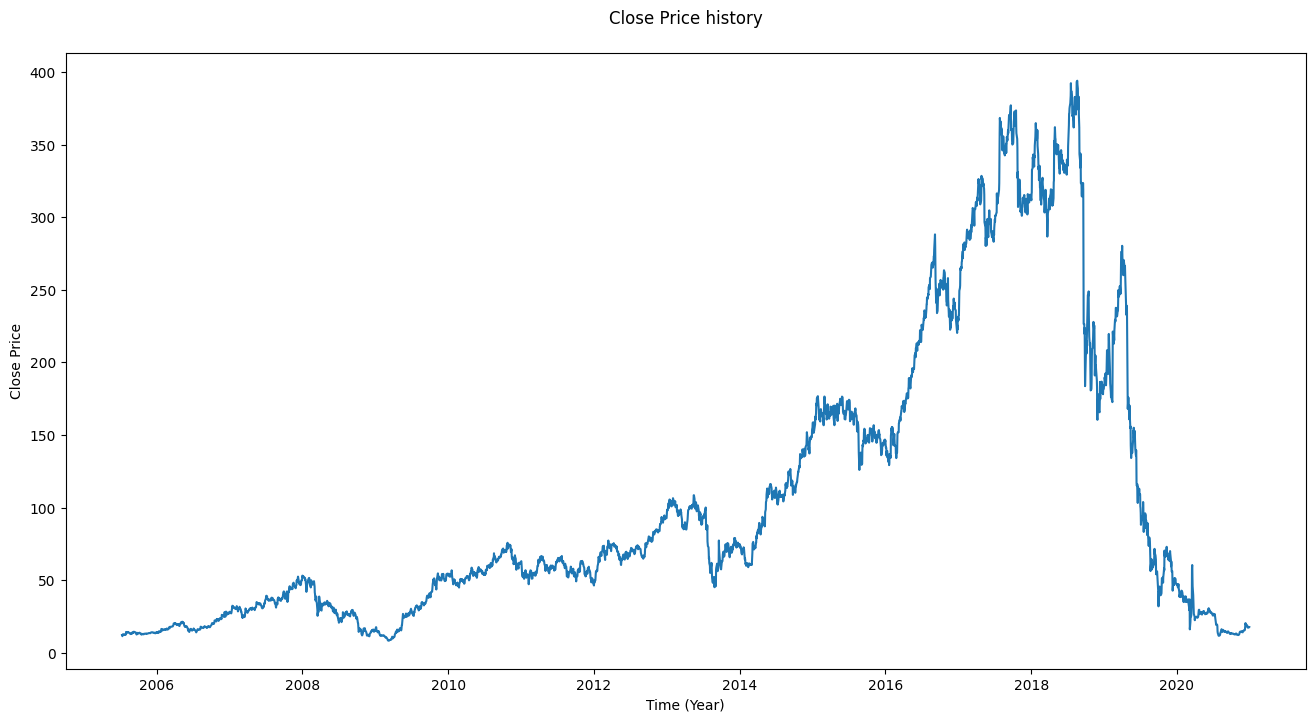

In [9]:
# Extract date frame and plot closing stock price w.r.t time
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
#plot
plt.figure(figsize=(16,8))
plt.title('Close Price history\n')
plt.xlabel('Time (Year)')
plt.ylabel('Close Price')
plt.plot(df['Close'])

In [10]:
# fix random seed for reproducibility
np.random.seed(7)

## Creating a dataframe for storing the closing stock data per day

In [11]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
	dataX, dataY = [], []
	for i in range(len(df2)-look_back-1):
		a = df2[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(df2[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
df2 = pd.read_csv('/Users/mahir/Downloads/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis/YESBANK.NS.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

## Data Normalization and Division into Training and Test sets

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [15]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

## Creating a LSTM Neural Network Model for Numerical Analysis

In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
511/511 - 3s - loss: 0.0092 - 3s/epoch - 5ms/step
Epoch 2/100
511/511 - 1s - loss: 3.0200e-04 - 675ms/epoch - 1ms/step
Epoch 3/100
511/511 - 1s - loss: 4.9662e-05 - 578ms/epoch - 1ms/step
Epoch 4/100
511/511 - 1s - loss: 4.5193e-05 - 814ms/epoch - 2ms/step
Epoch 5/100
511/511 - 1s - loss: 4.1119e-05 - 677ms/epoch - 1ms/step
Epoch 6/100
511/511 - 1s - loss: 3.7663e-05 - 816ms/epoch - 2ms/step
Epoch 7/100
511/511 - 1s - loss: 3.4480e-05 - 690ms/epoch - 1ms/step
Epoch 8/100
511/511 - 1s - loss: 3.3641e-05 - 569ms/epoch - 1ms/step
Epoch 9/100
511/511 - 1s - loss: 3.2998e-05 - 566ms/epoch - 1ms/step
Epoch 10/100
511/511 - 1s - loss: 3.2824e-05 - 566ms/epoch - 1ms/step
Epoch 11/100
511/511 - 1s - loss: 3.3349e-05 - 572ms/epoch - 1ms/step
Epoch 12/100
511/511 - 1s - loss: 3.2090e-05 - 556ms/epoch - 1ms/step
Epoch 13/100
511/511 - 1s - loss: 3.3196e-05 - 552ms/epoch - 1ms/step
Epoch 14/100
511/511 - 1s - loss: 3.2553e-05 - 560ms/epoch - 1ms/step
Epoch 15/100
511/511 - 1s - loss: 3.

## Making Predictions of the Model

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

40/40 [==============================] - 0s 732us/step


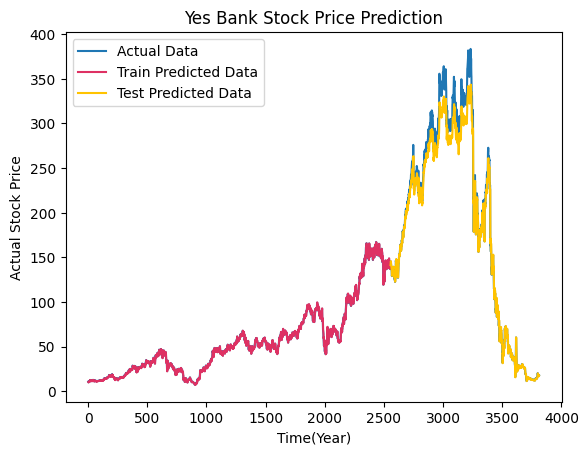

In [48]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace=True)
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('Yes Bank Stock Price Prediction')
plt.xlabel('Time(Year)')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#FFC300', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [20]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error of Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error of Testing = ",testScore," RMSE")


Root mean square error of Training  =  1.680896018577769  RMSE
Root mean square error of Testing =  14.137171898981833  RMSE


# **Step 2: Textual Data(News Headlines) Analysis**

## Importing Required Libraries for Textual (News Headlines) analysis

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

## Importing the textual dataset and performing Exploratory Analysis

In [22]:
data = pd.read_csv('/Users/mahir/Downloads/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis/india-news-headlines.csv')
data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [23]:
data['publish_date'].duplicated()

0          False
1           True
2           True
3           True
4           True
           ...  
3650965     True
3650966     True
3650967     True
3650968     True
3650969     True
Name: publish_date, Length: 3650970, dtype: bool

In [24]:
data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()

In [25]:
data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,86,20010103,unknown,Powerless north India gropes in the dark
2,127,20010104,unknown,The string that pulled Stephen Hawking to India
3,280,20010105,unknown,Light combat craft takes India into club class
4,406,20010106,unknown,Light combat craft takes India into club class


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7717 non-null   int64 
 1   Date               7717 non-null   int64 
 2   headline_category  7717 non-null   object
 3   headline_text      7717 non-null   object
dtypes: int64(2), object(2)
memory usage: 241.3+ KB


## Sentiment Analysis of News Headlines

In [27]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [28]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [29]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,773
neutral,5113
positive,1831


In [30]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    23.726837
Name: positive, dtype: float64


Negative Headlines:  headline_text    10.016846
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    66.256317
Name: neutral, dtype: float64


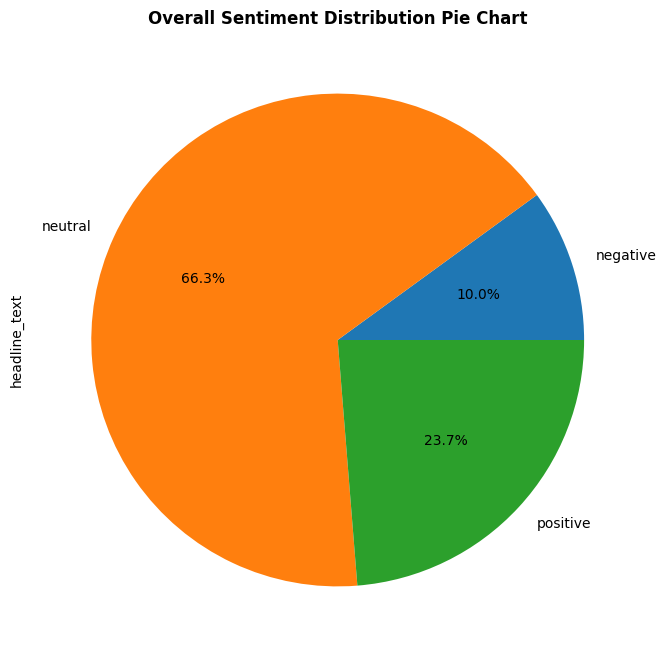

In [31]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()

# Step 3: Creating Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

## Importing Required Libraries

In [32]:
!pip install vaderSentiment

In [71]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Importing the numerical and textual dataset

In [34]:
stock_data=pd.read_csv('/Users/mahir/Downloads/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis/YESBANK.NS.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-12,13.18,14.00,12.00,12.17,10.848567,244941515
1,2005-07-13,12.20,12.60,11.49,11.74,10.465257,64111620
2,2005-07-14,12.00,12.00,11.40,11.45,10.206746,16282865
3,2005-07-15,11.25,12.89,11.25,12.37,11.026851,75448030
4,2005-07-18,12.54,13.14,12.50,12.82,11.427987,75684775


In [35]:
news_data=pd.read_csv('/Users/mahir/Downloads/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis/india-news-headlines.csv')
news_data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [36]:
news_data.rename(columns={'publish_date': 'Date'},inplace = True)
news_data.head()

,Date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


## Creating Hybrid data from Numerical and Textual Data

In [37]:
hybrid_data = pd.merge(stock_data,news_data, 
                   how ='inner',
                   left_index = True,
                   right_index = True)

In [38]:
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text
0,2005-07-12,13.18,14.00,12.00,12.17,10.848567,244941515,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2005-07-13,12.20,12.60,11.49,11.74,10.465257,64111620,20010102,unknown,Fissures in Hurriyat over Pak visit
2,2005-07-14,12.00,12.00,11.40,11.45,10.206746,16282865,20010102,unknown,America's unwanted heading for India?
3,2005-07-15,11.25,12.89,11.25,12.37,11.026851,75448030,20010102,unknown,For bigwigs; it is destination Goa
4,2005-07-18,12.54,13.14,12.50,12.82,11.427987,75684775,20010102,unknown,Extra buses to clear tourist traffic


## Performing Sentiment Analysis on Hybrid Data

## Sentiment Analysis using TextBlob

In [39]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [40]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['headline_text']])
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text,sentiment
0,2005-07-12,13.18,14.00,12.00,12.17,10.848567,244941515,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral
1,2005-07-13,12.20,12.60,11.49,11.74,10.465257,64111620,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral
2,2005-07-14,12.00,12.00,11.40,11.45,10.206746,16282865,20010102,unknown,America's unwanted heading for India?,neutral
3,2005-07-15,11.25,12.89,11.25,12.37,11.026851,75448030,20010102,unknown,For bigwigs; it is destination Goa,neutral
4,2005-07-18,12.54,13.14,12.50,12.82,11.427987,75684775,20010102,unknown,Extra buses to clear tourist traffic,positive


In [41]:
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [42]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)

In [43]:
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text,sentiment,neutral,positive
0,2005-07-12,13.18,14.00,12.00,12.17,10.848567,244941515,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,True,False
1,2005-07-13,12.20,12.60,11.49,11.74,10.465257,64111620,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral,True,False
2,2005-07-14,12.00,12.00,11.40,11.45,10.206746,16282865,20010102,unknown,America's unwanted heading for India?,neutral,True,False
3,2005-07-15,11.25,12.89,11.25,12.37,11.026851,75448030,20010102,unknown,For bigwigs; it is destination Goa,neutral,True,False
4,2005-07-18,12.54,13.14,12.50,12.82,11.427987,75684775,20010102,unknown,Extra buses to clear tourist traffic,positive,False,True


## Adding subjectivity and polarity scores to the news headlines

In [44]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [45]:
#Adding subjectivity and polarity columns
hybrid_data['Subjectivity'] =hybrid_data['headline_text'].apply(getSubjectivity)
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(getPolarity)
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity
0,2005-07-12,13.18,14.00,12.00,12.17,10.848567,244941515,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,True,False,0.000000,0.00
1,2005-07-13,12.20,12.60,11.49,11.74,10.465257,64111620,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral,True,False,0.000000,0.00
2,2005-07-14,12.00,12.00,11.40,11.45,10.206746,16282865,20010102,unknown,America's unwanted heading for India?,neutral,True,False,0.000000,0.00
3,2005-07-15,11.25,12.89,11.25,12.37,11.026851,75448030,20010102,unknown,For bigwigs; it is destination Goa,neutral,True,False,0.000000,0.00
4,2005-07-18,12.54,13.14,12.50,12.82,11.427987,75684775,20010102,unknown,Extra buses to clear tourist traffic,positive,False,True,0.241667,0.05


## Visualizing the polarity and Subjectivity scores


<Axes: title={'center': 'News Polarity'}>

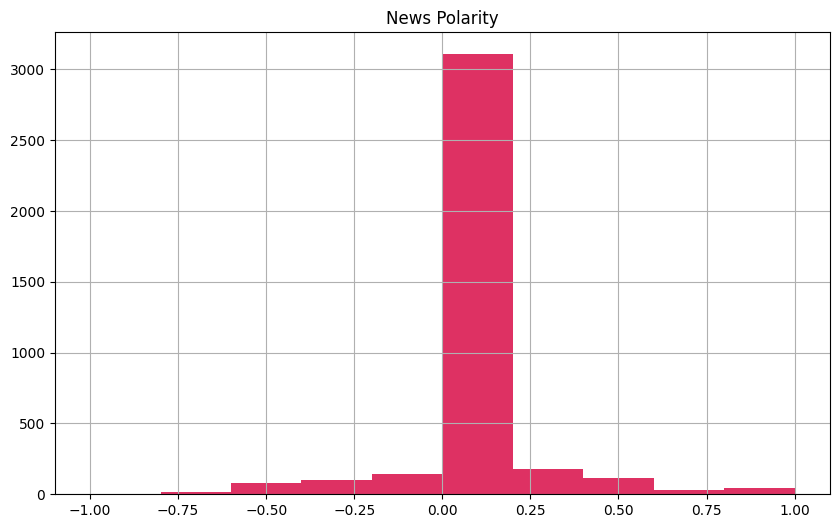

In [49]:
plt.figure(figsize = (10,6))
plt.title('News Polarity')
hybrid_data['Polarity'].hist(color = '#DE3163')

<Axes: title={'center': 'News Subjectivity'}>

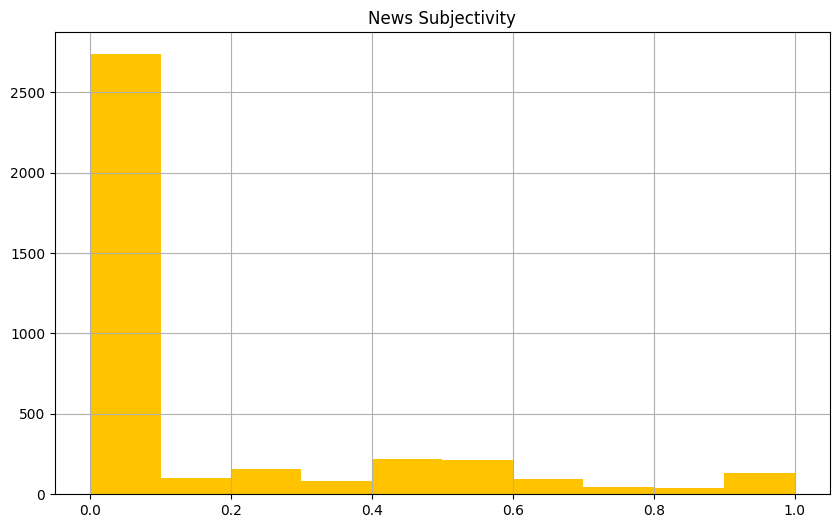

In [50]:
plt.figure(figsize = (10,6))
plt.title('News Subjectivity')
hybrid_data['Subjectivity'].hist(color = '#FFC300')

## Performing Sentiment Analysis over the news Headlines of Hybrid Data

In [51]:
#Adding sentiment score to news
senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2005-07-12,13.18,14.00,12.00,12.17,10.848567,244941515,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...,neutral,True,False,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2005-07-13,12.20,12.60,11.49,11.74,10.465257,64111620,20010102,unknown,Fissures in Hurriyat over Pak visit,neutral,True,False,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2005-07-14,12.00,12.00,11.40,11.45,10.206746,16282865,20010102,unknown,America's unwanted heading for India?,neutral,True,False,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2005-07-15,11.25,12.89,11.25,12.37,11.026851,75448030,20010102,unknown,For bigwigs; it is destination Goa,neutral,True,False,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2005-07-18,12.54,13.14,12.50,12.82,11.427987,75684775,20010102,unknown,Extra buses to clear tourist traffic,positive,False,True,0.241667,0.05,0.3818,0.000,0.658,0.342


In [52]:
hybrid_data.columns

Index(['Date_x', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Date_y', 'headline_category', 'headline_text', 'sentiment', 'neutral',
       'positive', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [53]:
req_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','positive']

In [54]:
new_hybrid = hybrid_data[req_col]
new_hybrid.reset_index(inplace = True)

In [55]:
new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)

C:\Users\mahir\AppData\Local\Temp\ipykernel_576448\2165816261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)


In [56]:
new_hybrid.head()

,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,0,13.18,14.00,12.00,244941515,0.2924,0.000,0.805,0.195,False
1,1,12.20,12.60,11.49,64111620,0.0000,0.000,1.000,0.000,False
2,2,12.00,12.00,11.40,16282865,-0.2263,0.322,0.678,0.000,False
3,3,11.25,12.89,11.25,75448030,0.0000,0.000,1.000,0.000,False
4,4,12.54,13.14,12.50,75684775,0.3818,0.000,0.658,0.342,True


In [57]:
new_hybrid.shape

(3813, 10)

## Training and Testing the Models for Stock Price/Performance Analysis

In [58]:
X = new_hybrid.drop('Label', axis=1)    

y = new_hybrid['Label']  

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [60]:
np.any(np.isnan(x_train)) 

False

In [61]:
np.all(np.isfinite(x_train)) 

True

In [62]:
x_train = x_train.fillna(x_train.mean())

In [63]:
x_test=x_test.fillna(x_test.mean())

In [68]:
#plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Stock Price/Performance analysis using Logistic Regressor Model

In [69]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
print(accuracy_score(y_test,y_logit_pred))
print(precision_score(y_test,y_logit_pred))
print(recall_score(y_test,y_logit_pred))
print(f1_score(y_test,y_logit_pred))

0.8204456094364351
0.16666666666666666
0.007518796992481203
0.014388489208633094


In [72]:
matrix_logit_cv=confusion_matrix(y_test,y_logit_pred)
print(matrix_logit_cv)
score_logit_cv=accuracy_score(y_test,y_logit_pred)
print(score_logit_cv)
report_logit_cv=classification_report(y_test,y_logit_pred)
print(report_logit_cv)

[[625   5]
 [132   1]]
0.8204456094364351
              precision    recall  f1-score   support

       False       0.83      0.99      0.90       630
        True       0.17      0.01      0.01       133

    accuracy                           0.82       763
   macro avg       0.50      0.50      0.46       763
weighted avg       0.71      0.82      0.75       763



[[625   5]
 [132   1]]


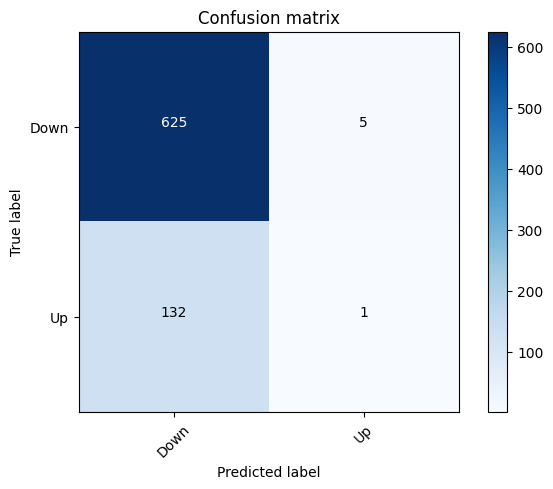

In [73]:
matrix = confusion_matrix(y_test, y_logit_pred)
print(matrix)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

## Stock Price/Performance analysis using Random Forest Model

In [74]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_rf_pred))
print(precision_score(y_test,y_rf_pred))
print(recall_score(y_test,y_rf_pred))
print(f1_score(y_test,y_rf_pred))

0.8440366972477065
0.6029411764705882
0.3082706766917293
0.4079601990049751


In [75]:
matrix_rf_cv=confusion_matrix(y_test,y_rf_pred)
print(matrix_rf_cv)
score_rf_cv=accuracy_score(y_test,y_rf_pred)
print(score_rf_cv)
report_rf_cv=classification_report(y_test,y_rf_pred)
print(report_rf_cv)

[[603  27]
 [ 92  41]]
0.8440366972477065
              precision    recall  f1-score   support

       False       0.87      0.96      0.91       630
        True       0.60      0.31      0.41       133

    accuracy                           0.84       763
   macro avg       0.74      0.63      0.66       763
weighted avg       0.82      0.84      0.82       763



[[603  27]
 [ 92  41]]


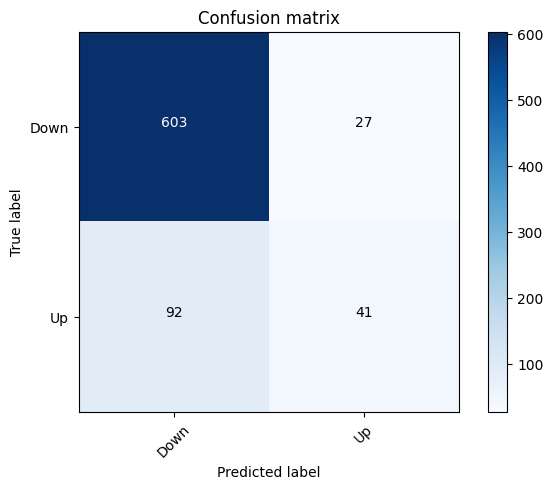

In [76]:
matrix = confusion_matrix(y_test, y_rf_pred)
print(matrix)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

## Stock Price/Performance analysis using Decision Tree Model

In [77]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_dt_pred))
print(precision_score(y_test,y_dt_pred))
print(recall_score(y_test,y_dt_pred))
print(f1_score(y_test,y_dt_pred))

0.7876802096985583
0.3893129770992366
0.38345864661654133
0.3863636363636363


In [78]:
matrix_dt_cv=confusion_matrix(y_test,y_dt_pred)
print(matrix_dt_cv)
score_dt_cv=accuracy_score(y_test,y_dt_pred)
print(score_dt_cv)
report_dt_cv=classification_report(y_test,y_dt_pred)
print(report_dt_cv)

[[550  80]
 [ 82  51]]
0.7876802096985583
              precision    recall  f1-score   support

       False       0.87      0.87      0.87       630
        True       0.39      0.38      0.39       133

    accuracy                           0.79       763
   macro avg       0.63      0.63      0.63       763
weighted avg       0.79      0.79      0.79       763



[[550  80]
 [ 82  51]]


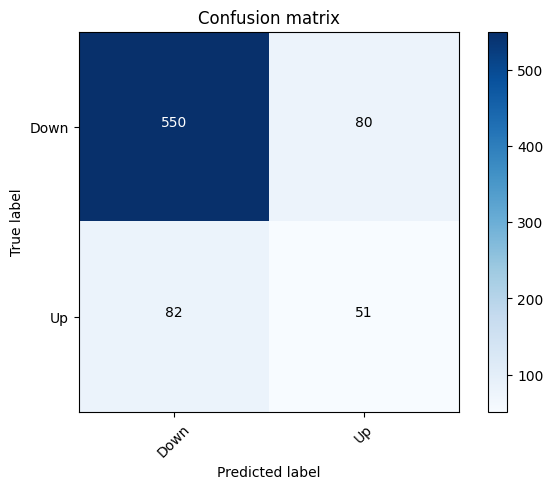

In [79]:
matrix = confusion_matrix(y_test, y_dt_pred)
print(matrix)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

## Stock Price/Performance analysis using Logistic Gradient Boosting Model

In [80]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_xgb_pred))
print(precision_score(y_test,y_xgb_pred))
print(recall_score(y_test,y_xgb_pred))
print(f1_score(y_test,y_xgb_pred))

0.8492791612057667
0.6956521739130435
0.24060150375939848
0.35754189944134074


In [81]:
matrix_xgb_cv=confusion_matrix(y_test,y_xgb_pred)
print(matrix_xgb_cv)
score_xgb_cv=accuracy_score(y_test,y_xgb_pred)
print(score_xgb_cv)
report_xgb_cv=classification_report(y_test,y_xgb_pred)
print(report_xgb_cv)

[[616  14]
 [101  32]]
0.8492791612057667
              precision    recall  f1-score   support

       False       0.86      0.98      0.91       630
        True       0.70      0.24      0.36       133

    accuracy                           0.85       763
   macro avg       0.78      0.61      0.64       763
weighted avg       0.83      0.85      0.82       763



[[616  14]
 [101  32]]


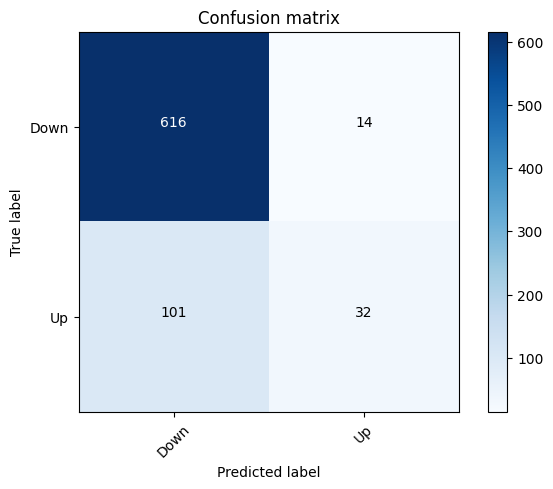

In [82]:
matrix = confusion_matrix(y_test, y_xgb_pred)
print(matrix)
plot_confusion_matrix(matrix, classes=['Down', 'Up'])

# Conclusion

In [83]:
print("Accuracy of Logistic Regression Model: ",accuracy_score(y_test,y_logit_pred)*100,"%")
print("Accuracy of Random forest Model      : ",accuracy_score(y_test,y_rf_pred)*100,"%")
print("Accuracy of Decision Tree Model      : ",accuracy_score(y_test,y_dt_pred)*100,"%")
print("Accuracy of Gradient Boosting Model  : ",accuracy_score(y_test,y_xgb_pred)*100,"%")

Accuracy of Logistic Regression Model:  82.0445609436435 %
Accuracy of Random forest Model      :  84.40366972477065 %
Accuracy of Decision Tree Model      :  78.76802096985584 %
Accuracy of Gradient Boosting Model  :  84.92791612057667 %
